# Package import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
pd.set_option('display.max_rows', 500)
from sklearn import preprocessing
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Reading data

In [2]:
data = pd.read_csv('./Measurement_summary.csv')

In [3]:
data.head(100)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [12]:
data.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,Year
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995,2017.985345
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595,0.813368
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2017.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000,2017.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000,2018.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000,2019.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000,2019.000000


min이 -1이라서 이상치이긴 하지만, 최대값도 아웃라이어로 생각되기 때문에 이에 대해서는 일단 고려하지 않도록 하겠다.

In [13]:
data.dtypes

Measurement date    datetime64[ns]
Station code                 int64
Address                     object
Latitude                   float64
Longitude                  float64
SO2                        float64
NO2                        float64
O3                         float64
CO                         float64
PM10                       float64
PM2.5                      float64
Year                         int64
dtype: object

# 1번.

In [4]:
addr = data['Address']

주소를 '구' 단위로 변경

In [5]:
addr = addr.str.split(',')
addr = addr.apply(lambda x: x[2])
data['Address'] = addr

In [6]:
data

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,Jongno-gu,37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,Jongno-gu,37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


# 2번.

In [7]:
data.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [8]:
data['Measurement date'] = pd.to_datetime(data['Measurement date'], format='%Y%m%d %H:%M', errors='ignore')

In [9]:
data['Year'] = data['Measurement date'].apply(lambda x: x.year)
data['Year']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
647506    2019
647507    2019
647508    2019
647509    2019
647510    2019
Name: Year, Length: 647511, dtype: int64

In [10]:
answer2 = data[['Year', 'Address', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']]

In [11]:
def all_stat(addr):
    ret_dict = {'Year' : 'All', 'Address' : addr, 'SO2' : answer2[answer2['Address'] == addr]['SO2'].mean(), 
               'NO2' : answer2[answer2['Address'] == addr]['NO2'].mean(),
               'O3' : answer2[answer2['Address'] == addr]['O3'].mean(),
               'CO' : answer2[answer2['Address'] == addr]['CO'].mean(),
               'PM10' : answer2[answer2['Address'] == addr]['PM10'].mean(),
               'PM2.5' : answer2[answer2['Address'] == addr]['PM2.5'].mean()}
    return pd.Series(ret_dict)
answer2_concat = pd.DataFrame(columns=['Year', 'Address', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'])
addresses = answer2['Address'].unique()
for _addr in range(len(addresses)):
    answer2_concat.loc[len(answer2_concat)] = all_stat(addresses[_addr])
answer2 = pd.concat([answer2, answer2_concat])
result = answer2.groupby(['Year', 'Address']).mean()
result

SO2       NO2        O3        CO       PM10  \
Year Address                                                               
2017  Dobong-gu        0.000969  0.022159  0.023401  0.556107  43.206393   
      Dongdaemun-gu    0.004911  0.029278  0.021417  0.484269  43.740068   
      Dongjak-gu       0.003228  0.030476  0.026389  0.476473  42.223174   
      Eunpyeong-gu    -0.000658  0.020616  0.021826  0.570913  43.206164   
      Gangbuk-gu       0.002865  0.023151  0.026188  0.470719  36.982078   
      Gangdong-gu      0.002855  0.029311  0.022216  0.512146  48.221689   
      Gangnam-gu       0.004219  0.028770  0.019393  0.435194  43.662900   
      Gangseo-gu      -0.004569  0.019811  0.016022  0.453368  64.922489   
      Geumcheon-gu     0.003344  0.030698  0.024634  0.503607  41.023516   
      Guro-gu          0.006427  0.022488  0.022382  0.517489  45.232763   
      Gwanak-gu        0.005377  0.031501  0.024602  0.489840  43.018037   
      Gwangjin-gu      0.003003  0.029278  0.026480  0.559235  41.607877   
      Jongno-gu        0.001478  0.030577  0.023095  0.566062  40.084703   
      Jung-gu          0.003430  0.034215  0.024924  0.511610  40.475571   
      Jungnang-gu      0.005974  0.028424  0.023059  0.446210  44.925114   
      Mapo-gu          0.004212  0.030140  0.025605  0.546895  40.590753   
      Nowon-gu         0.003500  0.029926  0.027415  0.556050  42.551142   
      Seocho-gu        0.004772  0.027580  0.025431  0.541644  46.901598   
      Seodaemun-gu     0.003627  0.024887  0.023234  0.479817  44.583562   
      Seongbuk-gu      0.001004  0.030282  0.019842  0.598014  47.194635   
      Seongdong-gu     0.003114  0.027847  0.019423  0.513607  48.476484   
      Songpa-gu        0.004054  0.028445  0.024072  0.567260  44.813242   
      Yangcheon-gu     0.004648  0.030397  0.021414  0.530696  43.529566   
      Yeongdeungpo-gu  0.004555  0.028454  0.025100  0.660936  49.430479   
      Yongsan-gu       0.003795  0.028047  0.020038  0.398447  38.889155   
2018  Dobong-gu       -0.000088  0.017270  0.020969  0.603219  40.748059   
      Dongdaemun-gu    0.006526  0.032370  0.020939  0.544155  35.695548   
      Dongjak-gu      -0.003880  0.027543  0.022732  0.472306  39.915525   
      Eunpyeong-gu     0.003999  0.024999  0.027964  0.515160  42.702511   
      Gangbuk-gu       0.003113  0.020700  0.029267  0.443470  35.215753   
      Gangdong-gu      0.005472  0.029757  0.020855  0.520845  45.092808   
      Gangnam-gu       0.005461  0.030727  0.017361  0.466712  35.404795   
      Gangseo-gu       0.003867  0.030429  0.024574  0.470422  52.254909   
      Geumcheon-gu     0.003976  0.030620  0.023297  0.476621  39.420205   
      Guro-gu          0.000236  0.035332  0.027468  0.347557  48.788470   
      Gwanak-gu        0.004296  0.031989  0.022094  0.425400  46.552626   
      Gwangjin-gu     -0.011004  0.024919  0.019263  0.592842  45.250228   
      Jongno-gu        0.004528  0.031051  0.024441  0.589646  35.605822   
      Jung-gu          0.003024  0.029961  0.021457  0.508059  36.027854   
      Jungnang-gu      0.005986  0.025956  0.022261  0.504578  34.484932   
      Mapo-gu         -0.001657  0.019938  0.012040  0.465890  45.967922   
      Nowon-gu         0.005117  0.025532  0.023067  0.506016  39.218037   
      Seocho-gu       -0.007111  0.015895  0.012836  0.364053  59.920890   
      Seodaemun-gu    -0.060537 -0.042284 -0.040501  0.436187  36.906393   
      Seongbuk-gu      0.003524  0.029015  0.019366  0.609737  41.422831   
      Seongdong-gu     0.004434  0.025271  0.014160  0.419635  42.536187   
      Songpa-gu        0.003660  0.027041  0.022622  0.591735  42.151370   
      Yangcheon-gu     0.003593  0.032820  0.021851  0.506301  37.235959   
      Yeongdeungpo-gu  0.005003  0.024218  0.022625  0.566518  51.883676   
      Yongsan-gu      -0.018967  0.006594 -0.000580  0.417066  33.725685   
2019  Dobong-gu        0.001903  0.017349  0.026574  0.558481  46.050884   


결과 도출

In [14]:
for i in range(2017, 2020):
    print("Year : %d" %(i))
    for j in range(len(result.columns)):
        print("%s -> max :%s\t min :%s" %(result.columns[j], result.xs(i)[result.columns[j]].idxmax(), result.xs(i)[result.columns[j]].idxmin()))
    print('\n')
print("Year : All")
for j in range(len(result.columns)):
    print("%s -> max :%s\t min :%s" %(result.columns[j], result.xs('All')[result.columns[j]].idxmax(), result.xs('All')[result.columns[j]].idxmin()))

Year : 2017
SO2 -> max : Guro-gu	 min : Gangseo-gu
NO2 -> max : Jung-gu	 min : Gangseo-gu
O3 -> max : Nowon-gu	 min : Gangseo-gu
CO -> max : Yeongdeungpo-gu	 min : Yongsan-gu
PM10 -> max : Gangseo-gu	 min : Gangbuk-gu
PM2.5 -> max : Yangcheon-gu	 min : Gangbuk-gu


Year : 2018
SO2 -> max : Dongdaemun-gu	 min : Seodaemun-gu
NO2 -> max : Guro-gu	 min : Seodaemun-gu
O3 -> max : Gangbuk-gu	 min : Seodaemun-gu
CO -> max : Seongbuk-gu	 min : Guro-gu
PM10 -> max : Seocho-gu	 min : Yongsan-gu
PM2.5 -> max : Yeongdeungpo-gu	 min : Gangbuk-gu


Year : 2019
SO2 -> max : Guro-gu	 min : Mapo-gu
NO2 -> max : Seongbuk-gu	 min : Mapo-gu
O3 -> max : Guro-gu	 min : Mapo-gu
CO -> max : Seodaemun-gu	 min : Guro-gu
PM10 -> max : Guro-gu	 min : Jungnang-gu
PM2.5 -> max : Guro-gu	 min : Jungnang-gu


Year : All
SO2 -> max : Yeongdeungpo-gu	 min : Seodaemun-gu
NO2 -> max : Jung-gu	 min : Seodaemun-gu
O3 -> max : Gangbuk-gu	 min : Mapo-gu
CO -> max : Seongbuk-gu	 min : Guro-gu
PM10 -> max : Gangseo-gu	 min : Y

# 3번.

In [15]:
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,Year
0,2017-01-01 00:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,2017
1,2017-01-01 01:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,2017
2,2017-01-01 02:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,2017
3,2017-01-01 03:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,2017
4,2017-01-01 04:00:00,101,Jongno-gu,37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,2017


In [16]:
data['date'] = data['Measurement date'].apply(lambda x: pd.datetime(x.year, x.month, x.day))
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,Year,date
0,2017-01-01 00:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,2017,2017-01-01
1,2017-01-01 01:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,2017,2017-01-01
2,2017-01-01 02:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,2017,2017-01-01
3,2017-01-01 03:00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,2017,2017-01-01
4,2017-01-01 04:00:00,101,Jongno-gu,37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,2017,2017-01-01


In [17]:
answer3 = data[['date', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].groupby('date').mean()
answer3

,SO2,NO2,O3,CO,PM10,PM2.5
date,,,,,,
2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333
...,...,...,...,...,...,...
2019-12-27,0.003433,0.028083,0.018195,0.556500,34.030000,24.853333
2019-12-28,0.003710,0.043712,0.005945,0.677167,42.831667,25.313333
2019-12-29,0.003337,0.037145,0.008980,0.641333,44.428333,27.306667


### 정규화
min_max_scaler 사용.

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()

# A

In [19]:
# Scaling (Before, After)
answer3_scaled = answer3.copy()
answer3_scaled
answer3_scaled['SO2'] = min_max_scaler.fit_transform(answer3_scaled['SO2'].values.reshape(-1, 1))
answer3_scaled['NO2'] = min_max_scaler.fit_transform(answer3_scaled['NO2'].values.reshape(-1, 1))
answer3_scaled['O3'] = min_max_scaler.fit_transform(answer3_scaled['O3'].values.reshape(-1, 1))
answer3_scaled['CO'] = min_max_scaler.fit_transform(answer3_scaled['CO'].values.reshape(-1, 1))
answer3_scaled['PM10'] = min_max_scaler.fit_transform(answer3_scaled['PM10'].values.reshape(-1, 1))
answer3_scaled['PM2.5'] = min_max_scaler.fit_transform(answer3_scaled['PM2.5'].values.reshape(-1, 1))
answer3_scaled

,SO2,NO2,O3,CO,PM10,PM2.5
date,,,,,,
2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333
...,...,...,...,...,...,...
2019-12-27,0.003433,0.028083,0.018195,0.556500,34.030000,24.853333
2019-12-28,0.003710,0.043712,0.005945,0.677167,42.831667,25.313333
2019-12-29,0.003337,0.037145,0.008980,0.641333,44.428333,27.306667


,SO2,NO2,O3,CO,PM10,PM2.5
date,,,,,,
2017-01-01,0.981039,0.756173,0.703979,0.684454,0.307404,0.393839
2017-01-02,0.976563,0.728101,0.743652,0.619919,0.443394,0.550900
2017-01-03,0.966320,0.731470,0.725383,0.521868,0.313112,0.354769
2017-01-04,0.983448,0.769080,0.720521,0.610768,0.213035,0.228017
2017-01-05,0.978582,0.721507,0.730978,0.452341,0.133585,0.135824
...,...,...,...,...,...,...
2019-12-27,0.980099,0.702989,0.762536,0.381150,0.124177,0.155843
2019-12-28,0.981445,0.752815,0.716895,0.467198,0.161532,0.159273
2019-12-29,0.979628,0.731879,0.728202,0.441645,0.168309,0.174135


Text(0.5, 1.0, 'Visualization per each air')

Text(0.5, 0, 'date')

Text(0, 0.5, 'degree of each air')

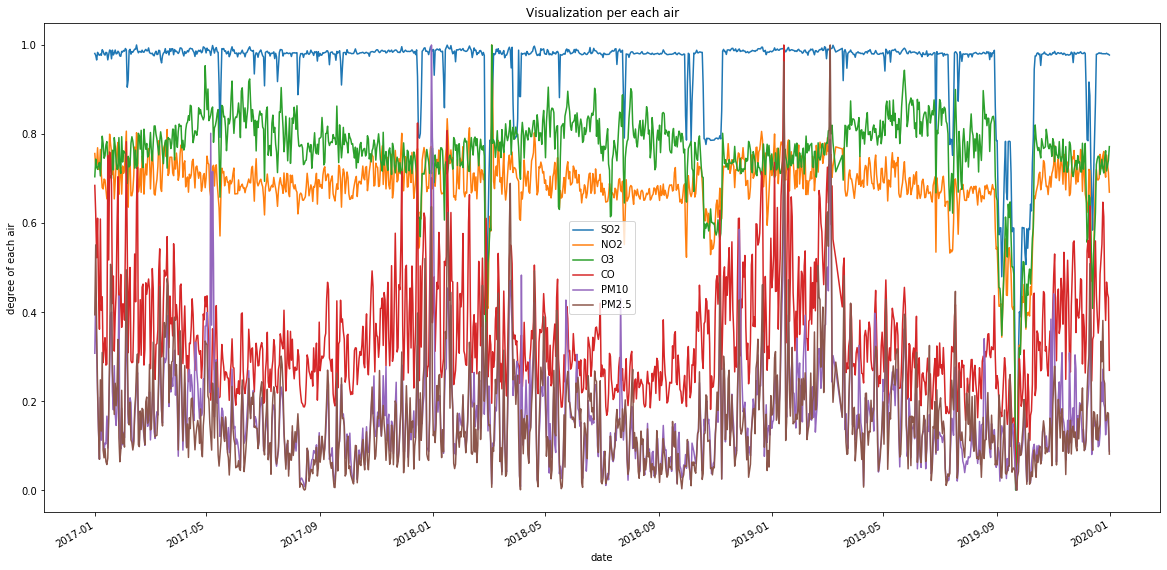

In [20]:
# Visualization
answer3_scaled.plot(figsize = (20, 10))
plt.title("Visualization per each air")
plt.xlabel("date")
plt.ylabel("degree of each air")
plt.show()

# B

In [21]:
answer3.head()

,SO2,NO2,O3,CO,PM10,PM2.5
date,,,,,,
2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333


In [22]:
# 변화율 구하기
answer3['dSO2'] = answer3['SO2'].pct_change()
answer3['dNO2'] = answer3['NO2'].pct_change()
answer3['dO3'] = answer3['O3'].pct_change()
answer3['dCO'] = answer3['CO'].pct_change()
answer3['dPM10'] = answer3['PM10'].pct_change()
answer3['dPM2.5'] = answer3['PM2.5'].pct_change()
answer3 = answer3.fillna(0)

In [23]:
answer3.head()

,SO2,NO2,O3,CO,PM10,PM2.5,dSO2,dNO2,dO3,dCO,dPM10,dPM2.5
date,,,,,,,,,,,,
2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333,-0.253676,-0.196694,4.296570,-0.092175,0.415039,0.371037
2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333,-0.777709,0.029385,-0.373540,-0.154263,-0.280994,-0.337944
2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333,5.850416,0.318685,-0.158695,0.165377,-0.300204,-0.329884
2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333,-0.242620,-0.305688,0.405685,-0.252893,-0.340570,-0.358060


변화율의 pairplot보다는 기존 값의 pairplot을 구하는 것이 더 많은 insight를 찾을 수 있을 것 같아서 이를 도출함.

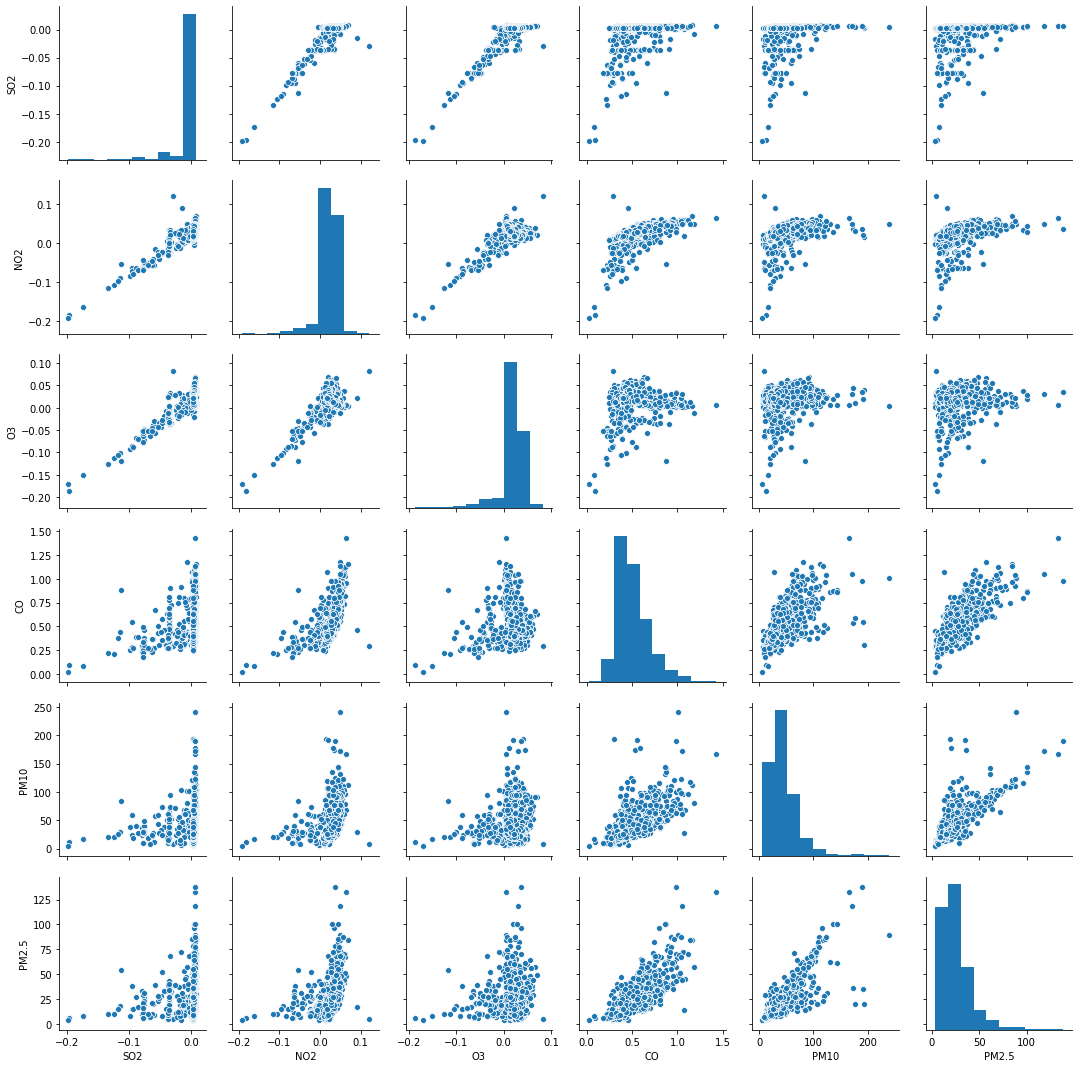

In [24]:
sns.pairplot(answer3[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']])
plt.show()

혹시 몰라서 변화율의 pairplot도 그렸음.

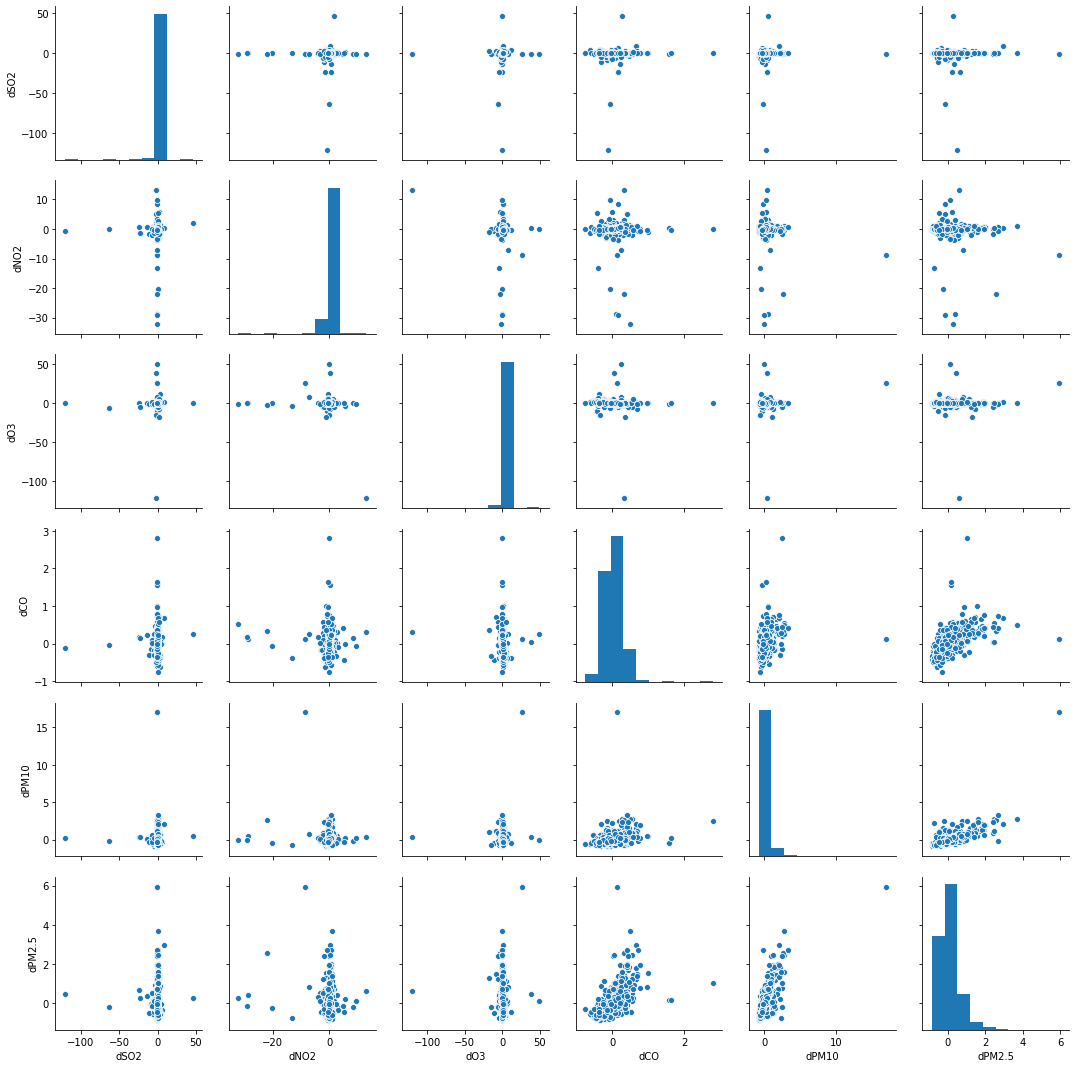

In [25]:
sns.pairplot(answer3[['dSO2', 'dNO2', 'dO3', 'dCO', 'dPM10', 'dPM2.5']])
plt.show()

# C

,SO2,NO2,O3,CO,PM10,PM2.5,DateInterval
0,0.004,0.059,0.002,1.2,73.0,57.0,0
1,0.004,0.058,0.002,1.2,71.0,59.0,0
2,0.004,0.056,0.002,1.2,70.0,59.0,0
3,0.004,0.056,0.002,1.2,70.0,58.0,0
4,0.003,0.051,0.002,1.2,69.0,61.0,0
...,...,...,...,...,...,...,...
647506,0.003,0.028,0.013,0.5,23.0,17.0,9
647507,0.003,0.025,0.015,0.4,25.0,19.0,9
647508,0.003,0.023,0.015,0.4,24.0,17.0,9
647509,0.003,0.040,0.004,0.5,25.0,18.0,9


10분위 분위별 평균농도는 다음과 같습니다.


,SO2,NO2,O3,CO,PM10,PM2.5
DateInterval,,,,,,
0,0.003922,0.034209,0.019817,0.620838,52.608519,32.770417
1,0.003156,0.023861,0.035220,0.429443,46.991836,22.868472
2,0.003361,0.024766,0.020528,0.459111,29.957654,16.476867
3,-0.002239,0.027933,0.007756,0.603455,52.887083,29.134938
4,0.001515,0.026989,0.030168,0.471969,48.165818,28.642485
5,0.001348,0.017118,0.023982,0.378233,26.428843,15.497284
6,-0.002667,0.028352,0.004537,0.649474,50.692937,29.733709
7,0.004153,0.031665,0.027567,0.576799,59.772027,35.804199
8,-0.006509,0.008581,0.021512,0.385483,30.722078,21.312374


plot입니다.


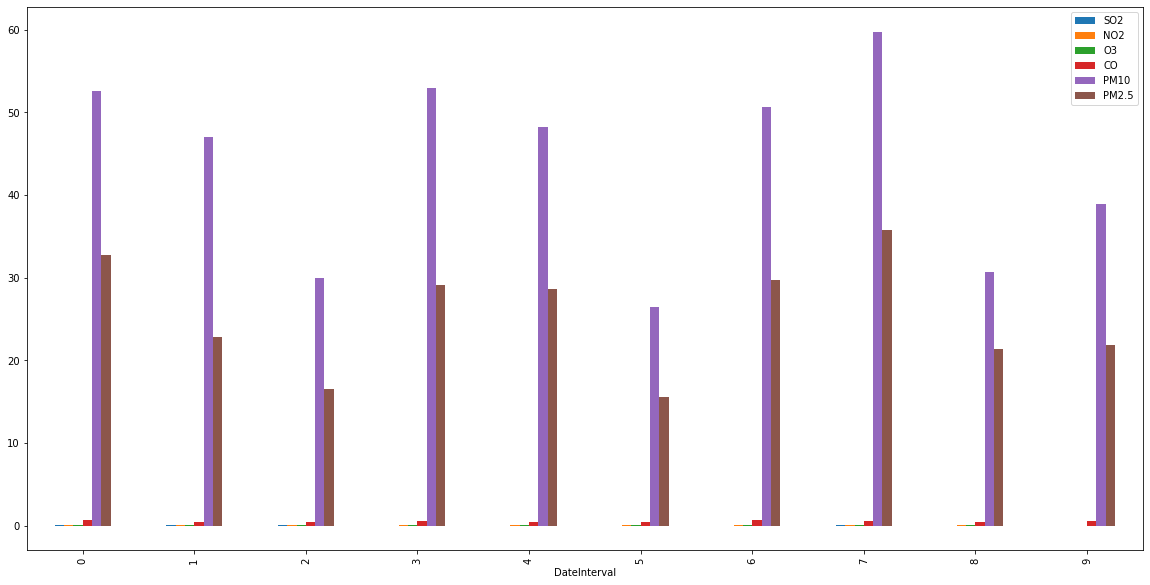

In [26]:
answer3_c = data[['date', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']]
answer3_c.columns = ['date', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']
answer3_c['DateInterval'] = pd.qcut(answer3_c.date, 10, labels=False)
answer3_c.drop(['date'], axis=1)
print('10분위 분위별 평균농도는 다음과 같습니다.')
answer3_c.groupby('DateInterval').mean()
print('plot입니다.')
answer3_c.groupby('DateInterval').mean().plot(kind = 'bar', figsize = (20, 10))

# 4번

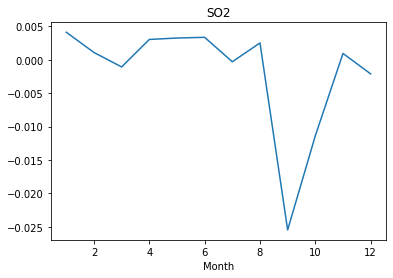

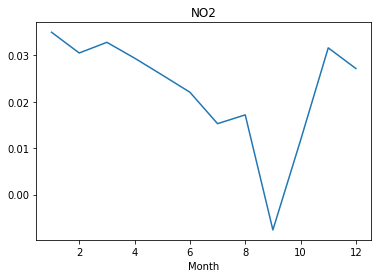

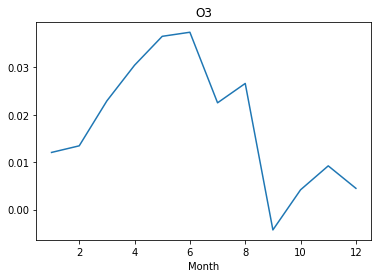

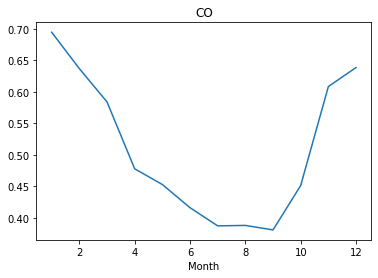

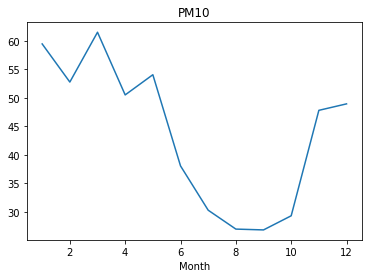

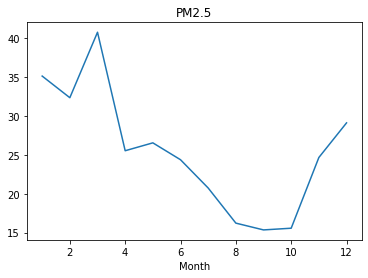

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,42.369902,3.851809,626.389888,0.0
Residual,647499.0,3981.613798,0.006149,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SO2   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     626.4
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:08:43   Log-Likelihood:             7.2961e+05
No. Observations:              647511   AIC:                        -1.459e+06
Df Residuals:                  647499   BIC:                        -1.459e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0041      0.000     12.350      0.000       0.003       0.005
C(Month)[T.2]     -0.0030      0.000     -6.275      0.000      -0.004      -0.002
C(Month)[T.3]     -0.0052      0.000    -10.749      0.000      -0.006      -0.004
C(Month)[T.4]     -0.0011      0.000     -2.281      0.023      -0.002      -0.000
C(Month)[T.5]     -0.0009      0.000     -1.830      0.067      -0.002    6.15e-05
C(Month)[T.6]     -0.0008      0.000     -1.603      0.109      -0.002       0.000
C(Month)[T.7]     -0.0044      0.000     -9.372      0.000      -0.005      -0.003
C(Month)[T.8]     -0.0016      0.000     -3.406      0.001      -0.003      -0.001
C(Month)[T.9]     -0.0295      0.000    -61.906      0.000      -0.030      -0.029
C(Month)[T.10]    -0.0155      0.000    -32.950      0.000      -0.016      -0.015
C(Month)[T.11]    -0.0032      0.000     -6.692      0.000      -0.004      -0.002
C(Month)[T.12]    -0.0062      0.000    -13.239      0.000      -0.007      -0.005
==============================================================================
Omnibus:                  1097882.539   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        743614762.991
Skew:                         -11.974   Prob(JB):                         0.00
Kurtosis:                     167.282   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,84.366365,7.66967,584.127289,0.0
Residual,647499.0,8501.748609,0.01313,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     584.1
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:08:48   Log-Likelihood:             4.8401e+05
No. Observations:              647511   AIC:                        -9.680e+05
Df Residuals:                  647499   BIC:                        -9.679e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0350      0.000     72.039      0.000       0.034       0.036
C(Month)[T.2]     -0.0045      0.001     -6.343      0.000      -0.006      -0.003
C(Month)[T.3]     -0.0022      0.001     -3.079      0.002      -0.004      -0.001
C(Month)[T.4]     -0.0056      0.001     -8.050      0.000      -0.007      -0.004
C(Month)[T.5]     -0.0092      0.001    -13.359      0.000      -0.011      -0.008
C(Month)[T.6]     -0.0129      0.001    -18.664      0.000      -0.014      -0.012
C(Month)[T.7]     -0.0197      0.001    -28.627      0.000      -0.021      -0.018
C(Month)[T.8]     -0.0178      0.001    -25.907      0.000      -0.019      -0.016
C(Month)[T.9]     -0.0426      0.001    -61.022      0.000      -0.044      -0.041
C(Month)[T.10]    -0.0233      0.001    -33.888      0.000      -0.025      -0.022
C(Month)[T.11]    -0.0034      0.001     -4.863      0.000      -0.005      -0.002
C(Month)[T.12]    -0.0078      0.001    -11.375      0.000      -0.009      -0.006
==============================================================================
Omnibus:                  2905364.326   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   59105908797533.688
Skew:                         148.157   Prob(JB):                         0.00
Kurtosis:                   46807.627   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,107.776025,9.797820,1010.51925,0.0
Residual,647499.0,6278.038707,0.009696,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1011.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:08:52   Log-Likelihood:             5.8218e+05
No. Observations:              647511   AIC:                        -1.164e+06
Df Residuals:                  647499   BIC:                        -1.164e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0121      0.000     28.921      0.000       0.011       0.013
C(Month)[T.2]      0.0014      0.001      2.301      0.021       0.000       0.003
C(Month)[T.3]      0.0109      0.001     17.944      0.000       0.010       0.012
C(Month)[T.4]      0.0184      0.001     30.919      0.000       0.017       0.020
C(Month)[T.5]      0.0245      0.001     41.289      0.000       0.023       0.026
C(Month)[T.6]      0.0253      0.001     42.615      0.000       0.024       0.026
C(Month)[T.7]      0.0105      0.001     17.698      0.000       0.009       0.012
C(Month)[T.8]      0.0145      0.001     24.642      0.000       0.013       0.016
C(Month)[T.9]     -0.0163      0.001    -27.250      0.000      -0.018      -0.015
C(Month)[T.10]    -0.0079      0.001    -13.359      0.000      -0.009      -0.007
C(Month)[T.11]    -0.0028      0.001     -4.762      0.000      -0.004      -0.002
C(Month)[T.12]    -0.0076      0.001    -12.817      0.000      -0.009      -0.006
==============================================================================
Omnibus:                  2395169.863   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   18641255349644.695
Skew:                          79.010   Prob(JB):                         0.00
Kurtosis:                   26288.230   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,7858.967824,714.451620,4695.752924,0.0
Residual,647499.0,98515.981821,0.152148,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4696.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:08:58   Log-Likelihood:            -3.0917e+05
No. Observations:              647511   AIC:                         6.184e+05
Df Residuals:                  647499   BIC:                         6.185e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6948      0.002    420.660      0.000       0.692       0.698
C(Month)[T.2]     -0.0577      0.002    -24.069      0.000      -0.062      -0.053
C(Month)[T.3]     -0.1106      0.002    -46.091      0.000      -0.115      -0.106
C(Month)[T.4]     -0.2167      0.002    -92.005      0.000      -0.221      -0.212
C(Month)[T.5]     -0.2417      0.002   -102.920      0.000      -0.246      -0.237
C(Month)[T.6]     -0.2784      0.002   -118.236      0.000      -0.283      -0.274
C(Month)[T.7]     -0.3073      0.002   -131.253      0.000      -0.312      -0.303
C(Month)[T.8]     -0.3065      0.002   -131.140      0.000      -0.311      -0.302
C(Month)[T.9]     -0.3137      0.002   -132.125      0.000      -0.318      -0.309
C(Month)[T.10]    -0.2432      0.002   -104.136      0.000      -0.248      -0.239
C(Month)[T.11]    -0.0862      0.002    -36.601      0.000      -0.091      -0.082
C(Month)[T.12]    -0.0560      0.002    -23.939      0.000      -0.061      -0.051
==============================================================================
Omnibus:                  2036042.783   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     947137642819.565
Skew:                          49.426   Prob(JB):                         0.00
Kurtosis:                    5927.179   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,42.369902,3.851809,626.389888,0.0
Residual,647499.0,3981.613798,0.006149,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1824.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:09:03   Log-Likelihood:            -3.6703e+06
No. Observations:              647511   AIC:                         7.341e+06
Df Residuals:                  647499   BIC:                         7.341e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         59.4506      0.297    200.402      0.000      58.869      60.032
C(Month)[T.2]     -6.6930      0.431    -15.544      0.000      -7.537      -5.849
C(Month)[T.3]      2.0495      0.431      4.756      0.000       1.205       2.894
C(Month)[T.4]     -8.9495      0.423    -21.156      0.000      -9.779      -8.120
C(Month)[T.5]     -5.4069      0.422    -12.820      0.000      -6.233      -4.580
C(Month)[T.6]    -21.4109      0.423    -50.621      0.000     -22.240     -20.582
C(Month)[T.7]    -29.1853      0.420    -69.409      0.000     -30.009     -28.361
C(Month)[T.8]    -32.5022      0.420    -77.412      0.000     -33.325     -31.679
C(Month)[T.9]    -32.6464      0.426    -76.554      0.000     -33.482     -31.811
C(Month)[T.10]   -30.1660      0.419    -71.911      0.000     -30.988     -29.344
C(Month)[T.11]   -11.6571      0.423    -27.560      0.000     -12.486     -10.828
C(Month)[T.12]   -10.5217      0.420    -25.048      0.000     -11.345      -9.698
==============================================================================
Omnibus:                  1576748.875   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      23307204444.970
Skew:                          25.794   Prob(JB):                         0.00
Kurtosis:                     931.020   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,3.717872e+07,3.379883e+06,1805.508848,0.0
Residual,647499.0,1.212108e+09,1.871984e+03,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM25   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1806.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:09:08   Log-Likelihood:            -3.3582e+06
No. Observations:              647511   AIC:                         6.716e+06
Df Residuals:                  647499   BIC:                         6.717e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         35.1519      0.183    191.875      0.000      34.793      35.511
C(Month)[T.2]     -2.7855      0.266    -10.475      0.000      -3.307      -2.264
C(Month)[T.3]      5.6445      0.266     21.212      0.000       5.123       6.166
C(Month)[T.4]     -9.6138      0.261    -36.801      0.000     -10.126      -9.102
C(Month)[T.5]     -8.5987      0.260    -33.015      0.000      -9.109      -8.088
C(Month)[T.6]    -10.7732      0.261    -41.244      0.000     -11.285     -10.261
C(Month)[T.7]    -14.4154      0.260    -55.514      0.000     -14.924     -13.906
C(Month)[T.8]    -18.9364      0.259    -73.032      0.000     -19.445     -18.428
C(Month)[T.9]    -19.8109      0.263    -75.225      0.000     -20.327     -19.295
C(Month)[T.10]   -19.5909      0.259    -75.624      0.000     -20.099     -19.083
C(Month)[T.11]   -10.4837      0.261    -40.135      0.000     -10.996      -9.972
C(Month)[T.12]    -6.0275      0.259    -23.236      0.000      -6.536      -5.519
==============================================================================
Omnibus:                  1497659.083   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      29929328506.217
Skew:                          22.402   Prob(JB):                         0.00
Kurtosis:                    1055.294   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
data['Month'] = data['Measurement date'].apply(lambda x: x.month)
answer4 = data[['Month', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']]
answer4.columns = ['Month', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM25']
answer4_month = answer4.groupby('Month').mean()
answer4_month['SO2'].plot(title = 'SO2')
plt.show()
answer4_month['NO2'].plot(title = 'NO2')
plt.show()
answer4_month['O3'].plot(title = 'O3')
plt.show()
answer4_month['CO'].plot(title = 'CO')
plt.show()
answer4_month['PM10'].plot(title = 'PM10')
plt.show()
answer4_month['PM25'].plot(title = 'PM2.5')
plt.show()

#SO2
model_SO2 = ols('SO2 ~ C(Month)', answer4).fit()
anova_lm(model_SO2)
model_SO2.summary()
#NO2
model_NO2 = ols('NO2 ~ C(Month)', answer4).fit()
anova_lm(model_NO2)
model_NO2.summary()
#O3
model_O3 = ols('O3 ~ C(Month)', answer4).fit()
anova_lm(model_O3)
model_O3.summary()

#CO
model_CO = ols('CO ~ C(Month)', answer4).fit()
anova_lm(model_CO)
model_CO.summary()
#PM10
model_PM10 = ols('PM10 ~ C(Month)', answer4).fit()
anova_lm(model_SO2)
model_PM10.summary()
#PM2.5
model_PM25 = ols('PM25 ~ C(Month)', answer4).fit()
anova_lm(model_PM25)
model_PM25.summary()


#### 기체별 그래프를 통해 기체 별로 다른 계절성(월별)을 가짐을 알 수 있다.
#### 모든 p-value가 0에 근사하는 것들은 근사하는 만큼 통계적으로 유의미하게 다름을 알 수 있다.

# 5번

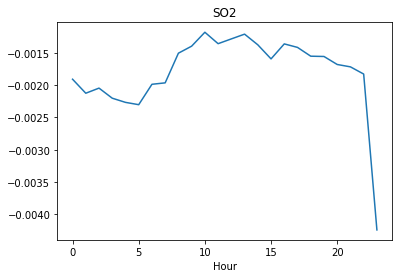

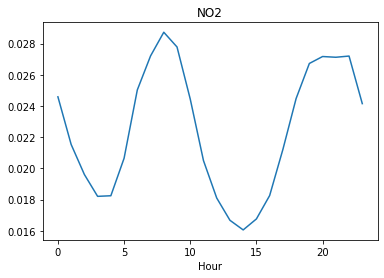

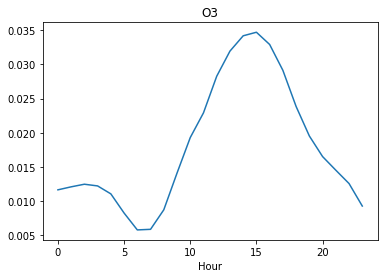

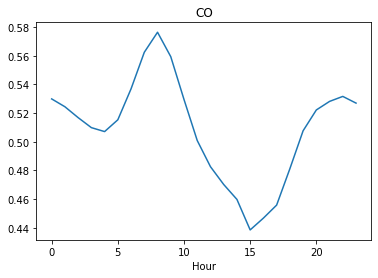

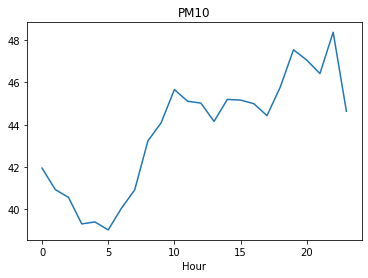

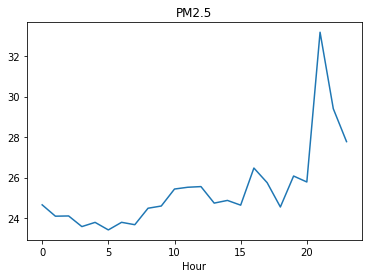

,df,sum_sq,mean_sq,F,PR(>F)
C(Hour),23.0,0.241314,0.010492,1.688323,0.020705
Residual,647487.0,4023.742385,0.006214,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SO2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.688
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0207
Time:                        13:10:13   Log-Likelihood:             7.2620e+05
No. Observations:              647511   AIC:                        -1.452e+06
Df Residuals:                  647487   BIC:                        -1.452e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0019      0.000     -3.971      0.000      -0.003      -0.001
C(Hour)[T.1]     -0.0002      0.001     -0.319      0.750      -0.002       0.001
C(Hour)[T.2]     -0.0001      0.001     -0.203      0.840      -0.001       0.001
C(Hour)[T.3]     -0.0003      0.001     -0.432      0.666      -0.002       0.001
C(Hour)[T.4]     -0.0004      0.001     -0.527      0.598      -0.002       0.001
C(Hour)[T.5]     -0.0004      0.001     -0.580      0.562      -0.002       0.001
C(Hour)[T.6]  -7.835e-05      0.001     -0.115      0.908      -0.001       0.001
C(Hour)[T.7]  -5.642e-05      0.001     -0.083      0.934      -0.001       0.001
C(Hour)[T.8]      0.0004      0.001      0.593      0.553      -0.001       0.002
C(Hour)[T.9]      0.0005      0.001      0.753      0.452      -0.001       0.002
C(Hour)[T.10]     0.0007      0.001      1.069      0.285      -0.001       0.002
C(Hour)[T.11]     0.0005      0.001      0.809      0.419      -0.001       0.002
C(Hour)[T.12]     0.0006      0.001      0.918      0.359      -0.001       0.002
C(Hour)[T.13]     0.0007      0.001      1.026      0.305      -0.001       0.002
C(Hour)[T.14]     0.0005      0.001      0.783      0.434      -0.001       0.002
C(Hour)[T.15]     0.0003      0.001      0.462      0.644      -0.001       0.002
C(Hour)[T.16]     0.0005      0.001      0.804      0.421      -0.001       0.002
C(Hour)[T.17]     0.0005      0.001      0.724      0.469      -0.001       0.002
C(Hour)[T.18]     0.0004      0.001      0.524      0.600      -0.001       0.002
C(Hour)[T.19]     0.0004      0.001      0.517      0.605      -0.001       0.002
C(Hour)[T.20]     0.0002      0.001      0.335      0.737      -0.001       0.002
C(Hour)[T.21]     0.0002      0.001      0.281      0.779      -0.001       0.002
C(Hour)[T.22]   7.98e-05      0.001      0.117      0.906      -0.001       0.001
C(Hour)[T.23]    -0.0023      0.001     -3.428      0.001      -0.004      -0.001
==============================================================================
Omnibus:                  1106344.081   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        768833113.139
Skew:                         -12.165   Prob(JB):                         0.00
Kurtosis:                     170.047   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Hour),23.0,10.614770,0.461512,34.846114,2.152881e-154
Residual,647487.0,8575.500204,0.013244,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     34.85
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          2.15e-154
Time:                        13:10:20   Log-Likelihood:             4.8121e+05
No. Observations:              647511   AIC:                        -9.624e+05
Df Residuals:                  647487   BIC:                        -9.621e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0246      0.001     35.031      0.000       0.023       0.026
C(Hour)[T.1]     -0.0031      0.001     -3.075      0.002      -0.005      -0.001
C(Hour)[T.2]     -0.0050      0.001     -5.016      0.000      -0.007      -0.003
C(Hour)[T.3]     -0.0064      0.001     -6.425      0.000      -0.008      -0.004
C(Hour)[T.4]     -0.0063      0.001     -6.388      0.000      -0.008      -0.004
C(Hour)[T.5]     -0.0039      0.001     -3.969      0.000      -0.006      -0.002
C(Hour)[T.6]      0.0004      0.001      0.446      0.656      -0.002       0.002
C(Hour)[T.7]      0.0026      0.001      2.643      0.008       0.001       0.005
C(Hour)[T.8]      0.0041      0.001      4.174      0.000       0.002       0.006
C(Hour)[T.9]      0.0032      0.001      3.222      0.001       0.001       0.005
C(Hour)[T.10]    -0.0001      0.001     -0.146      0.884      -0.002       0.002
C(Hour)[T.11]    -0.0041      0.001     -4.122      0.000      -0.006      -0.002
C(Hour)[T.12]    -0.0065      0.001     -6.537      0.000      -0.008      -0.005
C(Hour)[T.13]    -0.0079      0.001     -7.977      0.000      -0.010      -0.006
C(Hour)[T.14]    -0.0085      0.001     -8.595      0.000      -0.010      -0.007
C(Hour)[T.15]    -0.0078      0.001     -7.887      0.000      -0.010      -0.006
C(Hour)[T.16]    -0.0063      0.001     -6.379      0.000      -0.008      -0.004
C(Hour)[T.17]    -0.0034      0.001     -3.401      0.001      -0.005      -0.001
C(Hour)[T.18]    -0.0001      0.001     -0.109      0.913      -0.002       0.002
C(Hour)[T.19]     0.0021      0.001      2.155      0.031       0.000       0.004
C(Hour)[T.20]     0.0026      0.001      2.604      0.009       0.001       0.005
C(Hour)[T.21]     0.0025      0.001      2.555      0.011       0.001       0.004
C(Hour)[T.22]     0.0026      0.001      2.634      0.008       0.001       0.005
C(Hour)[T.23]    -0.0004      0.001     -0.439      0.660      -0.002       0.002
==============================================================================
Omnibus:                  2893785.358   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   57166401799908.406
Skew:                         146.171   Prob(JB):                         0.00
Kurtosis:                   46033.290   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Hour),23.0,55.467961,2.411650,246.670901,0.0
Residual,647487.0,6330.346771,0.009777,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     246.7
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:10:27   Log-Likelihood:             5.7949e+05
No. Observations:              647511   AIC:                        -1.159e+06
Df Residuals:                  647487   BIC:                        -1.159e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0116      0.001     19.281      0.000       0.010       0.013
C(Hour)[T.1]      0.0004      0.001      0.515      0.606      -0.001       0.002
C(Hour)[T.2]      0.0008      0.001      0.965      0.335      -0.001       0.002
C(Hour)[T.3]      0.0006      0.001      0.671      0.502      -0.001       0.002
C(Hour)[T.4]     -0.0006      0.001     -0.696      0.487      -0.002       0.001
C(Hour)[T.5]     -0.0034      0.001     -3.991      0.000      -0.005      -0.002
C(Hour)[T.6]     -0.0059      0.001     -6.897      0.000      -0.008      -0.004
C(Hour)[T.7]     -0.0058      0.001     -6.794      0.000      -0.007      -0.004
C(Hour)[T.8]     -0.0029      0.001     -3.438      0.001      -0.005      -0.001
C(Hour)[T.9]      0.0025      0.001      2.877      0.004       0.001       0.004
C(Hour)[T.10]     0.0077      0.001      8.985      0.000       0.006       0.009
C(Hour)[T.11]     0.0113      0.001     13.246      0.000       0.010       0.013
C(Hour)[T.12]     0.0166      0.001     19.538      0.000       0.015       0.018
C(Hour)[T.13]     0.0203      0.001     23.859      0.000       0.019       0.022
C(Hour)[T.14]     0.0226      0.001     26.481      0.000       0.021       0.024
C(Hour)[T.15]     0.0231      0.001     27.098      0.000       0.021       0.025
C(Hour)[T.16]     0.0213      0.001     24.998      0.000       0.020       0.023
C(Hour)[T.17]     0.0175      0.001     20.550      0.000       0.016       0.019
C(Hour)[T.18]     0.0122      0.001     14.326      0.000       0.011       0.014
C(Hour)[T.19]     0.0079      0.001      9.263      0.000       0.006       0.010
C(Hour)[T.20]     0.0049      0.001      5.720      0.000       0.003       0.007
C(Hour)[T.21]     0.0029      0.001      3.375      0.001       0.001       0.005
C(Hour)[T.22]     0.0009      0.001      1.080      0.280      -0.001       0.003
C(Hour)[T.23]    -0.0024      0.001     -2.787      0.005      -0.004      -0.001
==============================================================================
Omnibus:                  2383899.076   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   18061272419371.523
Skew:                          77.858   Prob(JB):                         0.00
Kurtosis:                   25876.093   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Hour),23.0,820.903884,35.691473,218.937746,0.0
Residual,647487.0,105554.045762,0.163021,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:10:34   Log-Likelihood:            -3.3151e+05
No. Observations:              647511   AIC:                         6.631e+05
Df Residuals:                  647487   BIC:                         6.633e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5299      0.002    215.213      0.000       0.525       0.535
C(Hour)[T.1]     -0.0055      0.003     -1.570      0.116      -0.012       0.001
C(Hour)[T.2]     -0.0131      0.003     -3.750      0.000      -0.020      -0.006
C(Hour)[T.3]     -0.0200      0.003     -5.754      0.000      -0.027      -0.013
C(Hour)[T.4]     -0.0228      0.003     -6.548      0.000      -0.030      -0.016
C(Hour)[T.5]     -0.0146      0.003     -4.183      0.000      -0.021      -0.008
C(Hour)[T.6]      0.0070      0.003      2.027      0.043       0.000       0.014
C(Hour)[T.7]      0.0325      0.003      9.350      0.000       0.026       0.039
C(Hour)[T.8]      0.0465      0.003     13.369      0.000       0.040       0.053
C(Hour)[T.9]      0.0294      0.003      8.467      0.000       0.023       0.036
C(Hour)[T.10]    -0.0004      0.003     -0.116      0.908      -0.007       0.006
C(Hour)[T.11]    -0.0290      0.003     -8.342      0.000      -0.036      -0.022
C(Hour)[T.12]    -0.0473      0.003    -13.588      0.000      -0.054      -0.040
C(Hour)[T.13]    -0.0597      0.003    -17.156      0.000      -0.066      -0.053
C(Hour)[T.14]    -0.0701      0.003    -20.138      0.000      -0.077      -0.063
C(Hour)[T.15]    -0.0914      0.003    -26.256      0.000      -0.098      -0.085
C(Hour)[T.16]    -0.0831      0.003    -23.895      0.000      -0.090      -0.076
C(Hour)[T.17]    -0.0740      0.003    -21.286      0.000      -0.081      -0.067
C(Hour)[T.18]    -0.0487      0.003    -13.990      0.000      -0.056      -0.042
C(Hour)[T.19]    -0.0222      0.003     -6.391      0.000      -0.029      -0.015
C(Hour)[T.20]    -0.0077      0.003     -2.215      0.027      -0.015      -0.001
C(Hour)[T.21]    -0.0017      0.003     -0.499      0.618      -0.009       0.005
C(Hour)[T.22]     0.0017      0.003      0.501      0.617      -0.005       0.009
C(Hour)[T.23]    -0.0029      0.003     -0.842      0.400      -0.010       0.004
==============================================================================
Omnibus:                  1969113.593   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     731064661399.008
Skew:                          44.956   Prob(JB):                         0.00
Kurtosis:                    5207.693   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Hour),23.0,0.241314,0.010492,1.688323,0.020705
Residual,647487.0,4023.742385,0.006214,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     41.04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          1.45e-184
Time:                        13:10:41   Log-Likelihood:            -3.6797e+06
No. Observations:              647511   AIC:                         7.359e+06
Df Residuals:                  647487   BIC:                         7.360e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        41.9444      0.433     96.758      0.000      41.095      42.794
C(Hour)[T.1]     -1.0172      0.613     -1.660      0.097      -2.218       0.184
C(Hour)[T.2]     -1.3854      0.613     -2.261      0.024      -2.586      -0.184
C(Hour)[T.3]     -2.6410      0.613     -4.309      0.000      -3.842      -1.440
C(Hour)[T.4]     -2.5500      0.613     -4.161      0.000      -3.751      -1.349
C(Hour)[T.5]     -2.9260      0.612     -4.777      0.000      -4.126      -1.726
C(Hour)[T.6]     -1.9001      0.612     -3.104      0.002      -3.100      -0.700
C(Hour)[T.7]     -1.0329      0.612     -1.687      0.092      -2.233       0.167
C(Hour)[T.8]      1.2872      0.612      2.103      0.035       0.087       2.487
C(Hour)[T.9]      2.1455      0.612      3.504      0.000       0.946       3.346
C(Hour)[T.10]     3.7176      0.613      6.069      0.000       2.517       4.918
C(Hour)[T.11]     3.1644      0.612      5.168      0.000       1.964       4.365
C(Hour)[T.12]     3.0776      0.612      5.025      0.000       1.877       4.278
C(Hour)[T.13]     2.2112      0.612      3.610      0.000       1.011       3.412
C(Hour)[T.14]     3.2527      0.613      5.309      0.000       2.052       4.454
C(Hour)[T.15]     3.2198      0.613      5.256      0.000       2.019       4.420
C(Hour)[T.16]     3.0506      0.612      4.981      0.000       1.850       4.251
C(Hour)[T.17]     2.4826      0.612      4.054      0.000       1.282       3.683
C(Hour)[T.18]     3.8344      0.613      6.258      0.000       2.633       5.035
C(Hour)[T.19]     5.6019      0.612      9.147      0.000       4.402       6.802
C(Hour)[T.20]     5.1151      0.612      8.352      0.000       3.915       6.315
C(Hour)[T.21]     4.4763      0.613      7.306      0.000       3.275       5.677
C(Hour)[T.22]     6.4311      0.612     10.500      0.000       5.231       7.632
C(Hour)[T.23]     2.6924      0.613      4.394      0.000       1.491       3.893
==============================================================================
Omnibus:                  1549850.499   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20918282664.606
Skew:                          24.716   Prob(JB):                         0.00
Kurtosis:                     882.143   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(Hour),23.0,2.885385e+06,125451.538884,65.170229,9.904284e-303
Residual,647487.0,1.246401e+09,1924.982317,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM25   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.17
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          9.90e-303
Time:                        13:10:47   Log-Likelihood:            -3.3672e+06
No. Observations:              647511   AIC:                         6.734e+06
Df Residuals:                  647487   BIC:                         6.735e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.6518      0.268     92.138      0.000      24.127      25.176
C(Hour)[T.1]     -0.5603      0.378     -1.481      0.139      -1.302       0.181
C(Hour)[T.2]     -0.5488      0.378     -1.451      0.147      -1.290       0.192
C(Hour)[T.3]     -1.0741      0.378     -2.839      0.005      -1.816      -0.333
C(Hour)[T.4]     -0.8661      0.378     -2.290      0.022      -1.607      -0.125
C(Hour)[T.5]     -1.2385      0.378     -3.276      0.001      -1.979      -0.498
C(Hour)[T.6]     -0.8629      0.378     -2.284      0.022      -1.604      -0.122
C(Hour)[T.7]     -0.9812      0.378     -2.597      0.009      -1.722      -0.241
C(Hour)[T.8]     -0.1674      0.378     -0.443      0.658      -0.908       0.573
C(Hour)[T.9]     -0.0578      0.378     -0.153      0.878      -0.798       0.683
C(Hour)[T.10]     0.7812      0.378      2.066      0.039       0.040       1.522
C(Hour)[T.11]     0.8688      0.378      2.299      0.021       0.128       1.610
C(Hour)[T.12]     0.9019      0.378      2.386      0.017       0.161       1.643
C(Hour)[T.13]     0.0860      0.378      0.227      0.820      -0.655       0.827
C(Hour)[T.14]     0.2188      0.378      0.578      0.563      -0.522       0.960
C(Hour)[T.15]    -0.0153      0.378     -0.040      0.968      -0.756       0.726
C(Hour)[T.16]     1.8187      0.378      4.811      0.000       1.078       2.560
C(Hour)[T.17]     1.0970      0.378      2.902      0.004       0.356       1.838
C(Hour)[T.18]    -0.1058      0.378     -0.280      0.780      -0.847       0.635
C(Hour)[T.19]     1.4238      0.378      3.767      0.000       0.683       2.165
C(Hour)[T.20]     1.1296      0.378      2.988      0.003       0.389       1.870
C(Hour)[T.21]     8.5273      0.378     22.550      0.000       7.786       9.268
C(Hour)[T.22]     4.7494      0.378     12.564      0.000       4.008       5.490
C(Hour)[T.23]     3.1237      0.378      8.259      0.000       2.382       3.865
==============================================================================
Omnibus:                  1467447.950   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      26401543560.600
Skew:                          21.316   Prob(JB):                         0.00
Kurtosis:                     991.310   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
data['Hour'] = data['Measurement date'].apply(lambda x: x.hour)
answer5 = data[['Hour', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']]
answer5.columns = ['Hour', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM25']
answer5_hour = answer5.groupby('Hour').mean()
answer5_hour['SO2'].plot(title = 'SO2')
plt.show()
answer5_hour['NO2'].plot(title = 'NO2')
plt.show()
answer5_hour['O3'].plot(title = 'O3')
plt.show()
answer5_hour['CO'].plot(title = 'CO')
plt.show()
answer5_hour['PM10'].plot(title = 'PM10')
plt.show()
answer5_hour['PM25'].plot(title = 'PM2.5')
plt.show()

#SO2
model_SO2 = ols('SO2 ~ C(Hour)', answer5).fit()
anova_lm(model_SO2)
model_SO2.summary()
#NO2
model_NO2 = ols('NO2 ~ C(Hour)', answer5).fit()
anova_lm(model_NO2)
model_NO2.summary()
#O3
model_O3 = ols('O3 ~ C(Hour)', answer5).fit()
anova_lm(model_O3)
model_O3.summary()
#CO
model_CO = ols('CO ~ C(Hour)', answer5).fit()
anova_lm(model_CO)
model_CO.summary()
#PM10
model_PM10 = ols('PM10 ~ C(Hour)', answer5).fit()
anova_lm(model_SO2)
model_PM10.summary()
#PM2.5
model_PM25 = ols('PM25 ~ C(Hour)', answer5).fit()
anova_lm(model_PM25)
model_PM25.summary()

#### 기체별 그래프를 통해 기체 별로 다른 시간별 특성을 가짐을 알 수 있다.
#### 모든 p-value가 0에 근사함에 따라 이것이 0에 근사하는 만큼 통계적으로 유의미하게 다름을 알 수 있다.

# 6번
by one-way ANOVA

In [30]:
answer6 = data[['Station code', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']]
answer6.columns = ['StationCode', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM25']
#SO2
model_SO2 = ols('SO2 ~ C(StationCode)', answer6).fit()
anova_lm(model_SO2)
model_SO2.summary()
#NO2
model_NO2 = ols('NO2 ~ C(StationCode)', answer6).fit()
anova_lm(model_NO2)
model_NO2.summary()
#O3
model_O3 = ols('O3 ~ C(StationCode)', answer6).fit()
anova_lm(model_O3)
model_O3.summary()
#CO
model_CO = ols('CO ~ C(StationCode)', answer6).fit()
anova_lm(model_CO)
model_CO.summary()
#PM10
model_PM10 = ols('PM10 ~ C(StationCode)', answer6).fit()
anova_lm(model_SO2)
model_PM10.summary()
#PM2.5
model_PM25 = ols('PM25 ~ C(StationCode)', answer6).fit()
anova_lm(model_PM25)
model_PM25.summary()

,df,sum_sq,mean_sq,F,PR(>F)
C(StationCode),24.0,32.807567,1.366982,221.764624,0.0
Residual,647486.0,3991.176133,0.006164,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SO2   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     221.8
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:11:51   Log-Likelihood:             7.2883e+05
No. Observations:              647511   AIC:                        -1.458e+06
Df Residuals:                  647486   BIC:                        -1.457e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0033      0.000      6.765      0.000       0.002       0.004
C(StationCode)[T.102] -1.884e-05      0.001     -0.027      0.978      -0.001       0.001
C(StationCode)[T.103]    -0.0076      0.001    -10.985      0.000      -0.009      -0.006
C(StationCode)[T.104]    -0.0139      0.001    -20.089      0.000      -0.015      -0.013
C(StationCode)[T.105]    -0.0214      0.001    -30.975      0.000      -0.023      -0.020
C(StationCode)[T.106]    -0.0210      0.001    -30.412      0.000      -0.022      -0.020
C(StationCode)[T.107]     0.0005      0.001      0.656      0.512      -0.001       0.002
C(StationCode)[T.108]    -0.0054      0.001     -7.805      0.000      -0.007      -0.004
C(StationCode)[T.109]    -0.0179      0.001    -26.015      0.000      -0.019      -0.017
C(StationCode)[T.110]    -0.0070      0.001    -10.121      0.000      -0.008      -0.006
C(StationCode)[T.111]    -0.0007      0.001     -0.983      0.325      -0.002       0.001
C(StationCode)[T.112]    -0.0006      0.001     -0.852      0.394      -0.002       0.001
C(StationCode)[T.113]    -0.0024      0.001     -3.459      0.001      -0.004      -0.001
C(StationCode)[T.114]     0.0009      0.001      1.316      0.188      -0.000       0.002
C(StationCode)[T.115]     0.0007      0.001      1.006      0.314      -0.001       0.002
C(StationCode)[T.116]    -0.0039      0.001     -5.628      0.000      -0.005      -0.003
C(StationCode)[T.117]     0.0004      0.001      0.535      0.592      -0.001       0.002
C(StationCode)[T.118]     0.0004      0.001      0.528      0.598      -0.001       0.002
C(StationCode)[T.119]     0.0011      0.001      1.563      0.118      -0.000       0.002
C(StationCode)[T.120]    -0.0038      0.001     -5.520      0.000      -0.005      -0.002
C(StationCode)[T.121]    -0.0168      0.001    -24.371      0.000      -0.018      -0.015
C(StationCode)[T.122]    -0.0033      0.001     -4.822      0.000      -0.005      -0.002
C(StationCode)[T.123]    -0.0060      0.001     -8.751      0.000      -0.007      -0.005
C(StationCode)[T.124] -8.242e-05      0.001     -0.119      0.905      -0.001       0.001
C(StationCode)[T.125]     0.0005      0.001      0.699      0.485      -0.001       0.002
==============================================================================
Omnibus:                  1099137.320   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        746049165.201
Skew:                         -12.003   Prob(JB):                         0.00
Kurtosis:                     167.548   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

,df,sum_sq,mean_sq,F,PR(>F)
C(StationCode),24.0,47.686712,1.986946,150.674093,0.0
Residual,647486.0,8538.428262,0.013187,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     150.7
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:11:59   Log-Likelihood:             4.8262e+05
No. Observations:              647511   AIC:                        -9.652e+05
Df Residuals:                  647486   BIC:                        -9.649e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0305      0.001     42.771      0.000       0.029       0.032
C(StationCode)[T.102]     0.0014      0.001      1.412      0.158      -0.001       0.003
C(StationCode)[T.103]    -0.0087      0.001     -8.662      0.000      -0.011      -0.007
C(StationCode)[T.104]    -0.0208      0.001    -20.599      0.000      -0.023      -0.019
C(StationCode)[T.105]    -0.0295      0.001    -29.185      0.000      -0.031      -0.027
C(StationCode)[T.106]    -0.0254      0.001    -25.175      0.000      -0.027      -0.023
C(StationCode)[T.107]    -0.0024      0.001     -2.392      0.017      -0.004      -0.000
C(StationCode)[T.108]    -0.0042      0.001     -4.160      0.000      -0.006      -0.002
C(StationCode)[T.109]    -0.0210      0.001    -20.834      0.000      -0.023      -0.019
C(StationCode)[T.110]    -0.0141      0.001    -13.999      0.000      -0.016      -0.012
C(StationCode)[T.111]    -0.0002      0.001     -0.207      0.836      -0.002       0.002
C(StationCode)[T.112]    -0.0093      0.001     -9.236      0.000      -0.011      -0.007
C(StationCode)[T.113]    -0.0116      0.001    -11.462      0.000      -0.014      -0.010
C(StationCode)[T.114]    -0.0039      0.001     -3.905      0.000      -0.006      -0.002
C(StationCode)[T.115]     0.0008      0.001      0.756      0.450      -0.001       0.003
C(StationCode)[T.116]    -0.0059      0.001     -5.868      0.000      -0.008      -0.004
C(StationCode)[T.117]    -0.0029      0.001     -2.900      0.004      -0.005      -0.001
C(StationCode)[T.118]  8.522e-05      0.001      0.084      0.933      -0.002       0.002
C(StationCode)[T.119]    -0.0027      0.001     -2.648      0.008      -0.005      -0.001
C(StationCode)[T.120]    -0.0026      0.001     -2.579      0.010      -0.005      -0.001
C(StationCode)[T.121]    -0.0179      0.001    -17.788      0.000      -0.020      -0.016
C(StationCode)[T.122]    -0.0066      0.001     -6.546      0.000      -0.009      -0.005
C(StationCode)[T.123]    -0.0094      0.001     -9.284      0.000      -0.011      -0.007
C(StationCode)[T.124]    -0.0016      0.001     -1.580      0.114      -0.004       0.000
C(StationCode)[T.125]    -0.0014      0.001     -1.402      0.161      -0.003       0.001
==============================================================================
Omnibus:                  2900066.432   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   58166081687095.055
Skew:                         147.246   Prob(JB):                         0.00
Kurtosis:                   46434.019   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

,df,sum_sq,mean_sq,F,PR(>F)
C(StationCode),24.0,39.896103,1.662338,169.611433,0.0
Residual,647486.0,6345.918629,0.009801,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     169.6
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:12:06   Log-Likelihood:             5.7870e+05
No. Observations:              647511   AIC:                        -1.157e+06
Df Residuals:                  647486   BIC:                        -1.157e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0235      0.001     38.235      0.000       0.022       0.025
C(StationCode)[T.102]     0.0007      0.001      0.850      0.396      -0.001       0.002
C(StationCode)[T.103]    -0.0097      0.001    -11.155      0.000      -0.011      -0.008
C(StationCode)[T.104]    -0.0106      0.001    -12.177      0.000      -0.012      -0.009
C(StationCode)[T.105]    -0.0209      0.001    -23.984      0.000      -0.023      -0.019
C(StationCode)[T.106]    -0.0240      0.001    -27.564      0.000      -0.026      -0.022
C(StationCode)[T.107]    -0.0047      0.001     -5.371      0.000      -0.006      -0.003
C(StationCode)[T.108]    -0.0015      0.001     -1.753      0.080      -0.003       0.000
C(StationCode)[T.109]    -0.0211      0.001    -24.223      0.000      -0.023      -0.019
C(StationCode)[T.110]    -0.0099      0.001    -11.398      0.000      -0.012      -0.008
C(StationCode)[T.111]    -0.0029      0.001     -3.321      0.001      -0.005      -0.001
C(StationCode)[T.112]     0.0040      0.001      4.627      0.000       0.002       0.006
C(StationCode)[T.113]  8.623e-05      0.001      0.099      0.921      -0.002       0.002
C(StationCode)[T.114]     0.0006      0.001      0.713      0.476      -0.001       0.002
C(StationCode)[T.115]    -0.0016      0.001     -1.824      0.068      -0.003       0.000
C(StationCode)[T.116]    -0.0030      0.001     -3.451      0.001      -0.005      -0.001
C(StationCode)[T.117]     0.0021      0.001      2.468      0.014       0.000       0.004
C(StationCode)[T.118]    -0.0001      0.001     -0.141      0.888      -0.002       0.002
C(StationCode)[T.119] -1.137e-05      0.001     -0.013      0.990      -0.002       0.002
C(StationCode)[T.120]    -0.0006      0.001     -0.659      0.510      -0.002       0.001
C(StationCode)[T.121]    -0.0182      0.001    -20.943      0.000      -0.020      -0.017
C(StationCode)[T.122]    -0.0023      0.001     -2.627      0.009      -0.004      -0.001
C(StationCode)[T.123]    -0.0118      0.001    -13.530      0.000      -0.013      -0.010
C(StationCode)[T.124]    -0.0009      0.001     -1.054      0.292      -0.003       0.001
C(StationCode)[T.125]    -0.0024      0.001     -2.743      0.006      -0.004      -0.001
==============================================================================
Omnibus:                  2382040.391   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   17844402068304.855
Skew:                          77.673   Prob(JB):                         0.00
Kurtosis:                   25720.285   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

,df,sum_sq,mean_sq,F,PR(>F)
C(StationCode),24.0,2347.599591,97.816650,608.82942,0.0
Residual,647486.0,104027.350054,0.160663,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     608.8
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:12:12   Log-Likelihood:            -3.2680e+05
No. Observations:              647511   AIC:                         6.536e+05
Df Residuals:                  647486   BIC:                         6.539e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5838      0.002    234.407      0.000       0.579       0.589
C(StationCode)[T.102]    -0.0794      0.004    -22.537      0.000      -0.086      -0.072
C(StationCode)[T.103]    -0.1484      0.004    -42.135      0.000      -0.155      -0.141
C(StationCode)[T.104]    -0.0572      0.004    -16.241      0.000      -0.064      -0.050
C(StationCode)[T.105]    -0.0213      0.004     -6.045      0.000      -0.028      -0.014
C(StationCode)[T.106]    -0.0878      0.004    -24.922      0.000      -0.095      -0.081
C(StationCode)[T.107]    -0.0997      0.004    -28.301      0.000      -0.107      -0.093
C(StationCode)[T.108]     0.0366      0.004     10.381      0.000       0.030       0.043
C(StationCode)[T.109]    -0.0932      0.004    -26.469      0.000      -0.100      -0.086
C(StationCode)[T.110]    -0.1188      0.004    -33.741      0.000      -0.126      -0.112
C(StationCode)[T.111]     0.0598      0.004     16.989      0.000       0.053       0.067
C(StationCode)[T.112]    -0.1214      0.004    -34.475      0.000      -0.128      -0.115
C(StationCode)[T.113]    -0.0109      0.004     -3.109      0.002      -0.018      -0.004
C(StationCode)[T.114]    -0.0524      0.004    -14.878      0.000      -0.059      -0.045
C(StationCode)[T.115]    -0.0601      0.004    -17.067      0.000      -0.067      -0.053
C(StationCode)[T.116]    -0.1063      0.004    -30.187      0.000      -0.113      -0.099
C(StationCode)[T.117]    -0.1752      0.004    -49.725      0.000      -0.182      -0.168
C(StationCode)[T.118]    -0.0915      0.004    -25.978      0.000      -0.098      -0.085
C(StationCode)[T.119]    -0.0081      0.004     -2.291      0.022      -0.015      -0.001
C(StationCode)[T.120]    -0.1131      0.004    -32.120      0.000      -0.120      -0.106
C(StationCode)[T.121]    -0.1479      0.004    -42.000      0.000      -0.155      -0.141
C(StationCode)[T.122]    -0.1557      0.004    -44.202      0.000      -0.163      -0.149
C(StationCode)[T.123]    -0.1307      0.004    -37.112      0.000      -0.138      -0.124
C(StationCode)[T.124]    -0.0155      0.004     -4.402      0.000      -0.022      -0.009
C(StationCode)[T.125]    -0.0659      0.004    -18.704      0.000      -0.073      -0.059
==============================================================================
Omnibus:                  1980978.644   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     767652256882.076
Skew:                          45.722   Prob(JB):                         0.00
Kurtosis:                    5336.355   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

,df,sum_sq,mean_sq,F,PR(>F)
C(StationCode),24.0,32.807567,1.366982,221.764624,0.0
Residual,647486.0,3991.176133,0.006164,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     143.1
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:12:19   Log-Likelihood:            -3.6784e+06
No. Observations:              647511   AIC:                         7.357e+06
Df Residuals:                  647486   BIC:                         7.357e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                37.9656      0.441     86.124      0.000      37.102      38.830
C(StationCode)[T.102]     0.0049      0.623      0.008      0.994      -1.217       1.227
C(StationCode)[T.103]    -2.4264      0.623     -3.892      0.000      -3.648      -1.205
C(StationCode)[T.104]     4.3629      0.623      6.998      0.000       3.141       5.585
C(StationCode)[T.105]     3.4721      0.624      5.569      0.000       2.250       4.694
C(StationCode)[T.106]     8.8218      0.623     14.151      0.000       7.600      10.044
C(StationCode)[T.107]    11.8845      0.624     19.061      0.000      10.662      13.107
C(StationCode)[T.108]     7.8096      0.623     12.526      0.000       6.588       9.032
C(StationCode)[T.109]     0.3044      0.623      0.488      0.625      -0.918       1.526
C(StationCode)[T.110]    -0.1890      0.623     -0.303      0.762      -1.411       1.033
C(StationCode)[T.111]     7.8713      0.623     12.626      0.000       6.649       9.093
C(StationCode)[T.112]     0.8650      0.623      1.387      0.165      -0.357       2.087
C(StationCode)[T.113]     5.3288      0.623      8.547      0.000       4.107       6.551
C(StationCode)[T.114]     2.4505      0.623      3.931      0.000       1.229       3.672
C(StationCode)[T.115]     4.7193      0.623      7.570      0.000       3.497       5.941
C(StationCode)[T.116]    16.5811      0.623     26.597      0.000      15.359      17.803
C(StationCode)[T.117]    13.5352      0.623     21.708      0.000      12.313      14.757
C(StationCode)[T.118]     1.9909      0.623      3.193      0.001       0.769       3.213
C(StationCode)[T.119]    12.5844      0.623     20.184      0.000      11.362      13.806
C(StationCode)[T.120]     3.6898      0.623      5.918      0.000       2.468       4.912
C(StationCode)[T.121]     7.0688      0.623     11.339      0.000       5.847       8.291
C(StationCode)[T.122]    15.8720      0.623     25.460      0.000      14.650      17.094
C(StationCode)[T.123]     1.6925      0.623      2.715      0.007       0.471       2.914
C(StationCode)[T.124]     7.9133      0.623     12.693      0.000       6.691       9.135
C(StationCode)[T.125]     7.3582      0.623     11.803      0.000       6.136       8.580
==============================================================================
Omnibus:                  1547281.235   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20676037875.064
Skew:                          24.615   Prob(JB):                         0.00
Kurtosis:                     877.033   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

,df,sum_sq,mean_sq,F,PR(>F)
C(StationCode),24.0,4.931794e+06,205491.424425,106.925163,0.0
Residual,647486.0,1.244355e+09,1921.824745,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM25   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:12:28   Log-Likelihood:            -3.3667e+06
No. Observations:              647511   AIC:                         6.733e+06
Df Residuals:                  647486   BIC:                         6.734e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                22.8505      0.272     83.894      0.000      22.317      23.384
C(StationCode)[T.102]     0.0167      0.385      0.043      0.965      -0.738       0.772
C(StationCode)[T.103]     0.8200      0.385      2.129      0.033       0.065       1.575
C(StationCode)[T.104]     2.0402      0.385      5.296      0.000       1.285       2.795
C(StationCode)[T.105]    -0.0051      0.385     -0.013      0.989      -0.760       0.750
C(StationCode)[T.106]     7.0002      0.385     18.173      0.000       6.245       7.755
C(StationCode)[T.107]     2.6528      0.385      6.886      0.000       1.898       3.408
C(StationCode)[T.108]     6.4431      0.385     16.725      0.000       5.688       7.198
C(StationCode)[T.109]    -0.1579      0.385     -0.410      0.682      -0.913       0.597
C(StationCode)[T.110]    -0.6989      0.385     -1.814      0.070      -1.454       0.056
C(StationCode)[T.111]     3.0044      0.385      7.800      0.000       2.249       3.759
C(StationCode)[T.112]    -1.1244      0.385     -2.919      0.004      -1.879      -0.369
C(StationCode)[T.113]     2.8828      0.385      7.483      0.000       2.128       3.638
C(StationCode)[T.114]     1.3971      0.385      3.627      0.000       0.642       2.152
C(StationCode)[T.115]     2.8761      0.385      7.466      0.000       2.121       3.631
C(StationCode)[T.116]     0.5634      0.385      1.463      0.144      -0.192       1.318
C(StationCode)[T.117]     7.9668      0.385     20.680      0.000       7.212       8.722
C(StationCode)[T.118]     2.0428      0.385      5.303      0.000       1.288       2.798
C(StationCode)[T.119]     8.5710      0.385     22.249      0.000       7.816       9.326
C(StationCode)[T.120]     1.5226      0.385      3.952      0.000       0.768       2.278
C(StationCode)[T.121]     4.7869      0.385     12.427      0.000       4.032       5.542
C(StationCode)[T.122]     7.0023      0.385     18.179      0.000       6.247       7.757
C(StationCode)[T.123]     1.2388      0.385      3.216      0.001       0.484       1.994
C(StationCode)[T.124]     1.1454      0.385      2.974      0.003       0.390       1.900
C(StationCode)[T.125]     2.0546      0.385      5.334      0.000       1.300       2.810
==============================================================================
Omnibus:                  1467457.220   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      26542620548.207
Skew:                          21.313   Prob(JB):                         0.00
Kurtosis:                     993.952   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

#### 기체별로 분석한 결과, 관측소별 결과가 P-value가 0에 근접하는 만큼 통계적으로 유의미하게 다르다.